## #Numerical EDA

### import libraries and data

In [1]:
import pandas as pd

votes_data=pd.read_csv('https://assets.datacamp.com/production/repositories/628/datasets/35a8c54b79d559145bbeb5582de7a6169c703136/house-votes-84.csv',header=None)


In [2]:
votes_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [3]:
votes_data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,435,435,435,435,435,435,435,435,435,435,435,435,435,435,435,435,435
unique,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
top,democrat,n,y,y,n,y,y,y,y,y,y,n,n,y,y,n,y
freq,267,236,195,253,247,212,272,239,242,207,216,264,233,209,248,233,269


In [4]:
votes_data.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
dtype: int64

In [5]:
## votes_data = votes_data[(votes_data != '?').all(axis=1)]  it reduces rows from 435 to 232  so won't use it
import numpy as np
votes_data= votes_data.replace("?", 0) # replaced with 0 because every column has 3 or 2 unique values so it won't affect 
votes_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,n,y,n,y,y,y,n,n,n,y,0,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,0
2,democrat,0,y,y,0,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,0,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,0,y,y,y,y


### replacing 'y' and 'n' with 0 and 1 in dataframe

In [6]:
votes_data.replace(('y', 'n'), (1, 0), inplace=True)
votes_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,0
2,democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0
3,democrat,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1


### renaming columns for better understanding

In [7]:
votes_data.columns=['party','infants','water','budget','physician','salvador','religious','satellite','aid','missile','immigration','synfuels','education','superfund','crime','duty_free_exports','eaa_rsa']

In [8]:
votes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
party                435 non-null object
infants              435 non-null int64
water                435 non-null int64
budget               435 non-null int64
physician            435 non-null int64
salvador             435 non-null int64
religious            435 non-null int64
satellite            435 non-null int64
aid                  435 non-null int64
missile              435 non-null int64
immigration          435 non-null int64
synfuels             435 non-null int64
education            435 non-null int64
superfund            435 non-null int64
crime                435 non-null int64
duty_free_exports    435 non-null int64
eaa_rsa              435 non-null int64
dtypes: int64(16), object(1)
memory usage: 57.9+ KB


In [9]:
votes_data.describe()

,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
count,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000
mean,0.429885,0.448276,0.581609,0.406897,0.487356,0.625287,0.549425,0.556322,0.475862,0.496552,0.344828,0.393103,0.480460,0.570115,0.400000,0.618391
std,0.495630,0.497890,0.493863,0.491821,0.500416,0.484606,0.498124,0.497390,0.499992,0.500564,0.475859,0.489002,0.500193,0.495630,0.490462,0.486341
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## #Visual EDA

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# votes of parties for bills

plt.figure()
sns.countplot(x='education', hue='party', data=votes_data, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

<Figure size 640x480 with 1 Axes>

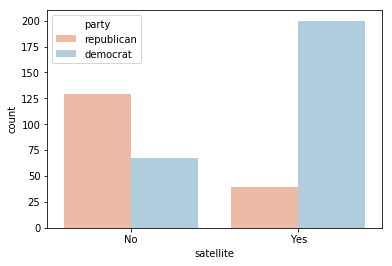

In [11]:
plt.figure()
sns.countplot(x='satellite',hue='party',data=votes_data,palette='RdBu')
plt.xticks([0,1],['No','Yes'])
plt.show()

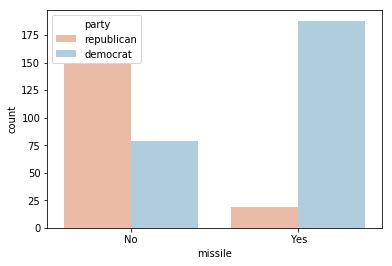

In [12]:
plt.figure()
sns.countplot(x='missile',hue='party',data=votes_data,palette='RdBu')
plt.xticks([0,1],['No','Yes'])
plt.show()

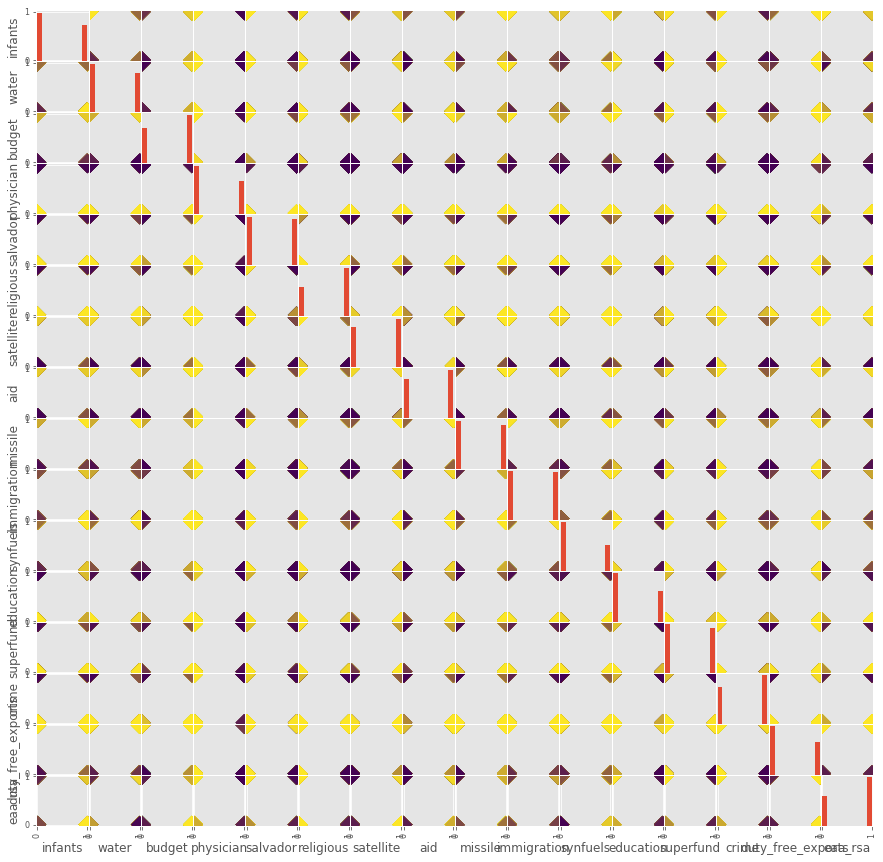

In [13]:
from pandas.plotting import scatter_matrix

x=votes_data.drop('party',axis=1)
y=votes_data['party']# replace party names with numerical values
y=y.replace(to_replace=['republican','democrat'],value=[0,1])
plt.style.use('ggplot')

_=pd.plotting.scatter_matrix(x,c=y,s=150,figsize=(15,15),marker='D')

## #k-Nearest Neighbors: Fit

### Import KNeighborsClassifier from sklearn.neighbors

In [14]:
from sklearn.neighbors import KNeighborsClassifier


### Create arrays for the features and the response variable

In [15]:
x=votes_data.drop('party',axis=1).values
y=votes_data['party'].values
x

array([[0, 1, 0, ..., 1, 0, 1],
       [0, 1, 0, ..., 1, 0, 0],
       [0, 1, 1, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 1],
       [0, 0, 0, ..., 1, 0, 1],
       [0, 1, 0, ..., 1, 0, 0]], dtype=int64)

### Create a k-NN classifier with 6 neighbors

In [16]:
knn=KNeighborsClassifier(n_neighbors=6)

### Fit the classifier to the data

In [17]:
knn.fit(x,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='uniform')

### Predict the labels for the training data x

In [18]:
y_pred=knn.predict(x)

### Predict and print the label for the same data point x

In [19]:
new_prediction = knn.predict(x)
print("Prediction: {}".format(new_prediction))


Prediction: ['republican' 'republican' 'democrat' 'democrat' 'democrat' 'democrat'
 'republican' 'republican' 'republican' 'democrat' 'republican'
 'republican' 'democrat' 'democrat' 'republican' 'republican' 'democrat'
 'democrat' 'republican' 'democrat' 'democrat' 'democrat' 'democrat'
 'democrat' 'democrat' 'democrat' 'democrat' 'democrat' 'republican'
 'democrat' 'republican' 'democrat' 'democrat' 'republican' 'democrat'
 'republican' 'republican' 'republican' 'republican' 'democrat' 'democrat'
 'democrat' 'democrat' 'democrat' 'democrat' 'democrat' 'democrat'
 'democrat' 'democrat' 'republican' 'democrat' 'republican' 'democrat'
 'republican' 'democrat' 'republican' 'republican' 'republican'
 'republican' 'republican' 'democrat' 'republican' 'democrat' 'democrat'
 'democrat' 'republican' 'republican' 'republican' 'democrat' 'democrat'
 'democrat' 'democrat' 'democrat' 'republican' 'democrat' 'democrat'
 'democrat' 'republican' 'democrat' 'republican' 'democrat' 'democrat'
 'republ

### Accuracy of model 

In [20]:
knn.score(x,y)*100

94.94252873563218

# MEASURING MODEL PERFORMANCE

* computing accuracy on same data used for training isn't indicative of well genealization.
* split data in train/test and compare precitions of test data with known levels

## 1.split in train and test

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

### instansiate model

In [23]:
knn=KNeighborsClassifier(n_neighbors=6)

### fit model with train data

In [24]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='uniform')

### Predict on test data 

In [25]:
knn.predict(x_test)

array(['republican', 'democrat', 'democrat', 'republican', 'democrat',
       'democrat', 'republican', 'republican', 'republican', 'democrat',
       'democrat', 'democrat', 'republican', 'republican', 'democrat',
       'democrat', 'democrat', 'republican', 'democrat', 'democrat',
       'democrat', 'democrat', 'democrat', 'republican', 'republican',
       'democrat', 'republican', 'democrat', 'democrat', 'democrat',
       'democrat', 'republican', 'democrat', 'republican', 'democrat',
       'republican', 'democrat', 'democrat', 'republican', 'republican',
       'democrat', 'democrat', 'democrat', 'republican', 'democrat',
       'republican', 'republican', 'democrat', 'republican', 'democrat',
       'republican', 'democrat', 'democrat', 'democrat', 'democrat',
       'republican', 'democrat', 'democrat', 'republican', 'democrat',
       'democrat', 'republican', 'democrat', 'republican', 'democrat',
       'democrat', 'democrat', 'democrat', 'democrat', 'republican',
       'de

### accuracy of model

In [26]:
knn.score(x_test,y_test)*100

96.55172413793103

## 2. overfitting and underfitting

In [27]:
# Setup arrays to store train and test accuracies
neighbors=np.arange(1,9)

train_accuracy=np.empty(len(neighbors))
test_accuracy=np.empty(len(neighbors))

# Loop over different values of k
for i,k in enumerate(neighbors):
    knn=KNeighborsClassifier(k)
    
    # fit classifier on training data
    knn.fit(x_train,y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i]=knn.score(x_train,y_train)
    
    #compute accuracy on test set
    test_accuracy[i]=knn.score(x_test,y_test)
    

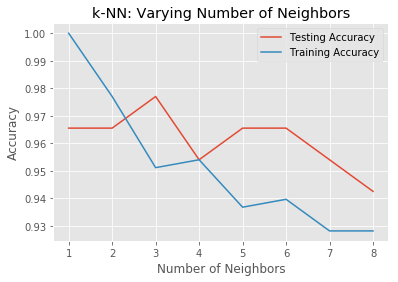

In [28]:
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

## Model Complexity

* Larger k = smoother decision boundary = less complex model
* smaller k = more complex